In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Iris Dataset/Iris.csv')

In [ ]:
data.head()
#the head function prints the first 5 rows of the data, sample would choose randomly

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df = data.drop("Id", axis = 'columns')

In [ ]:
# Display general information and statistics about the dataset
print(iris_df.describe(include='all'))

        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
count      150.000000    150.000000     150.000000    150.000000          150
unique            NaN           NaN            NaN           NaN            3
top               NaN           NaN            NaN           NaN  Iris-setosa
freq              NaN           NaN            NaN           NaN           50
mean         5.843333      3.054000       3.758667      1.198667          NaN
std          0.828066      0.433594       1.764420      0.763161          NaN
min          4.300000      2.000000       1.000000      0.100000          NaN
25%          5.100000      2.800000       1.600000      0.300000          NaN
50%          5.800000      3.000000       4.350000      1.300000          NaN
75%          6.400000      3.300000       5.100000      1.800000          NaN
max          7.900000      4.400000       6.900000      2.500000          NaN


In [ ]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
# Rename the columns
iris_df = iris_df.rename(columns={
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species' : 'species'
})

In [ ]:
# These are all the features variable represented in a vector X
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [ ]:
# This is the response, or target, or the class label 'species' that will decide what species the flower belongs to
Y = iris_df['species']

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

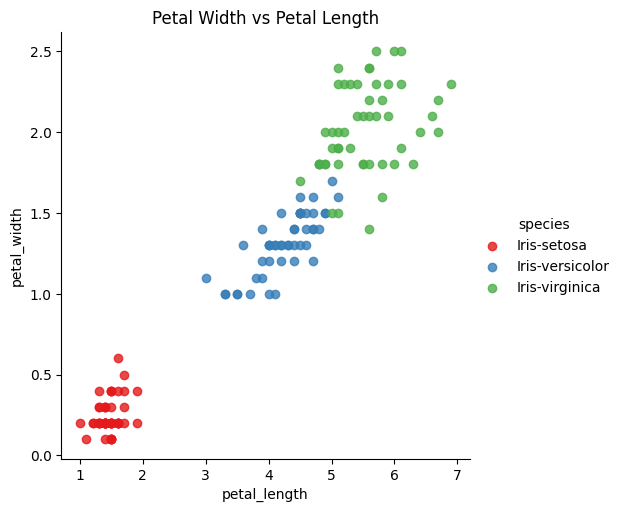

In [ ]:
# Scatter plot: petal_width vs petal_length
sns.lmplot(x='petal_length', y='petal_width', hue='species', data=iris_df, fit_reg=False, palette='Set1')
plt.title('Petal Width vs Petal Length')
plt.show()

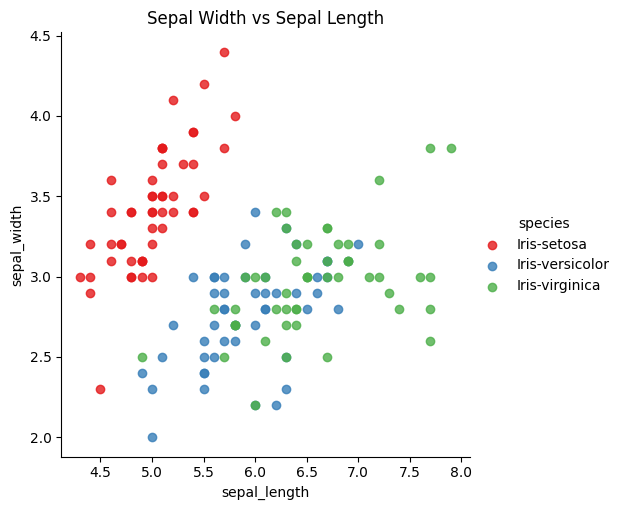

In [ ]:
# Scatter plot: sepal_width vs sepal_length
sns.lmplot(x='sepal_length', y='sepal_width', hue='species', data=iris_df, fit_reg=False, palette='Set1')
plt.title('Sepal Width vs Sepal Length')
plt.show()

In [29]:
def knn_classifier(X_train, y_train, X_test, y_test, k, distance_metric):
    predictions = []
    for index_test, test_row in X_test.iterrows():
        distances = []
        for index_train, train_row in X_train.iterrows():
            if distance_metric == "euclidean":
                distance = np.linalg.norm(test_row - train_row)
            elif distance_metric == "manhattan":
                distance = np.sum(np.abs(test_row - train_row))
            elif distance_metric == "cosine":
                distance = 1 - np.dot(test_row, train_row) / (np.linalg.norm(test_row) * np.linalg.norm(train_row))
            else:
                raise ValueError("Invalid distance metric.")
            distances.append((distance, index_train))

        sorted_distances = sorted(distances, key=lambda x: x[0])
        k_nearest_neighbors = [y_train.loc[i] for _, i in sorted_distances[:k]]
        predicted_class = max(set(k_nearest_neighbors), key=k_nearest_neighbors.count)
        predictions.append(predicted_class)

    accuracy = accuracy_score(y_test, predictions)
    correct_predictions = np.sum(y_test == predictions)
    incorrect_predictions = len(y_test) - correct_predictions
    conf_matrix = confusion_matrix(y_test, predictions)

    return accuracy, correct_predictions, incorrect_predictions, conf_matrix



In [31]:
def knn_classifier(X_train, y_train, X_test, y_test, k, distance_metric):

    predictions = []
    for index_test, test_row in X_test.iterrows():
        # Calculate distances to all training instances
        distances = []
        for index_train, train_row in X_train.iterrows():
            if distance_metric == "euclidean":
                distance = np.linalg.norm(test_row - train_row)  # Euclidean distance
            elif distance_metric == "manhattan":
                distance = np.sum(np.abs(test_row - train_row))  # Manhattan distance
            elif distance_metric == "cosine":
                distance = 1 - np.dot(test_row, train_row) / (np.linalg.norm(test_row) * np.linalg.norm(train_row))  # Cosine distance
            else:
                raise ValueError("Invalid distance metric.")
            distances.append((distance, index_train))

        # Sort by distances (ascending order) and select the k nearest neighbors
        sorted_distances = sorted(distances, key=lambda x: x[0])
        k_nearest_neighbors = [y_train.loc[i] for _, i in sorted_distances[:k]]

        # Predict the class by majority vote
        predicted_class = max(set(k_nearest_neighbors), key=k_nearest_neighbors.count)
        predictions.append(predicted_class)

    # The confusion matrix (TP, NP)
    accuracy = accuracy_score(y_test, predictions)
    correct_predictions = np.sum(y_test == predictions)
    incorrect_predictions = len(y_test) - correct_predictions
    conf_matrix = confusion_matrix(y_test, predictions)
    return accuracy, correct_predictions, incorrect_predictions, conf_matrix

k=3, distance_metric=euclidean, accuracy score=100.0, number of correct predictions=30, number of incorrect predictions=0


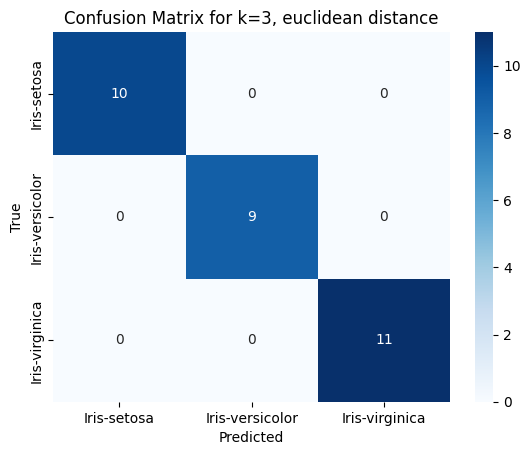

k=3, distance_metric=manhattan, accuracy score=100.0, number of correct predictions=30, number of incorrect predictions=0


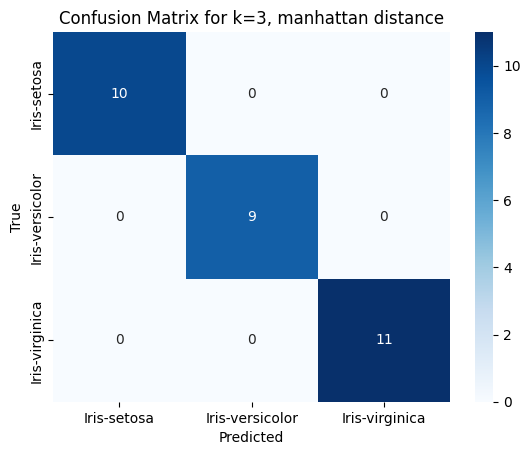

k=3, distance_metric=cosine, accuracy score=96.66666666666667, number of correct predictions=29, number of incorrect predictions=1


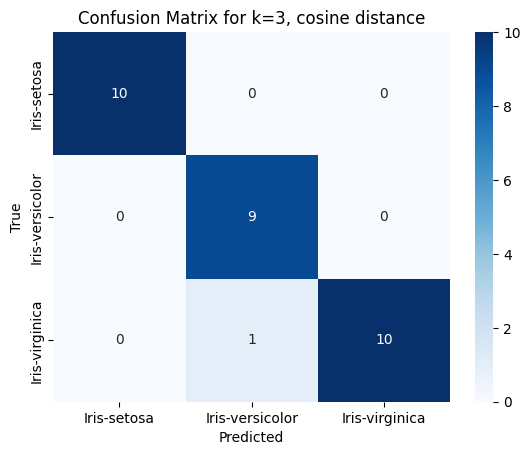

k=5, distance_metric=euclidean, accuracy score=100.0, number of correct predictions=30, number of incorrect predictions=0


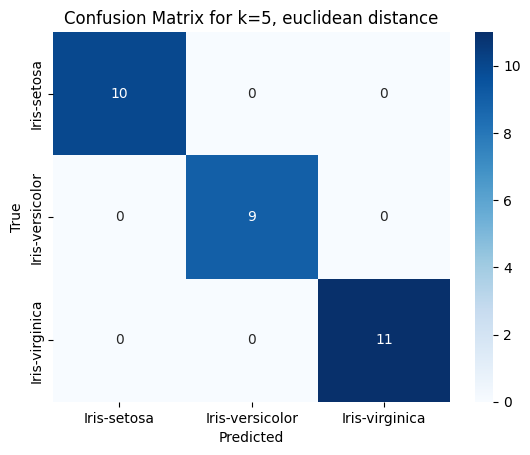

k=5, distance_metric=manhattan, accuracy score=100.0, number of correct predictions=30, number of incorrect predictions=0


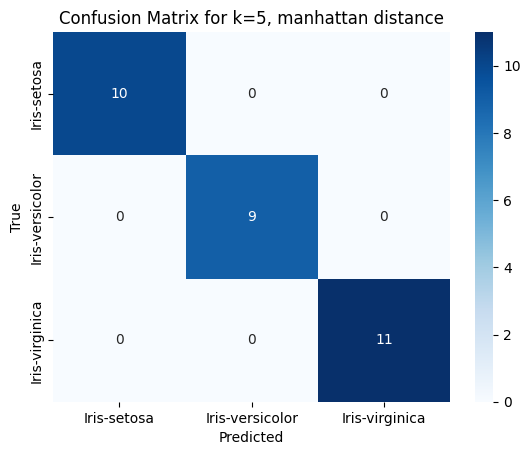

k=5, distance_metric=cosine, accuracy score=100.0, number of correct predictions=30, number of incorrect predictions=0


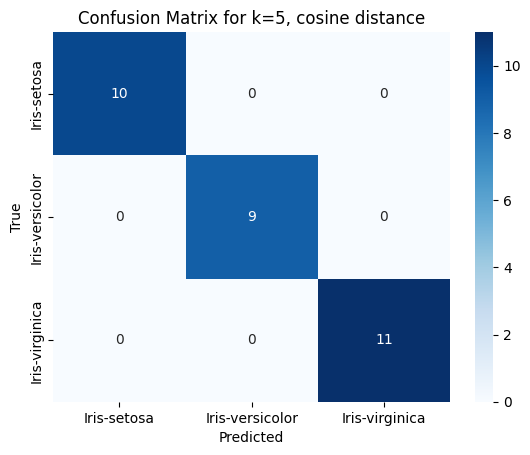

k=7, distance_metric=euclidean, accuracy score=96.66666666666667, number of correct predictions=29, number of incorrect predictions=1


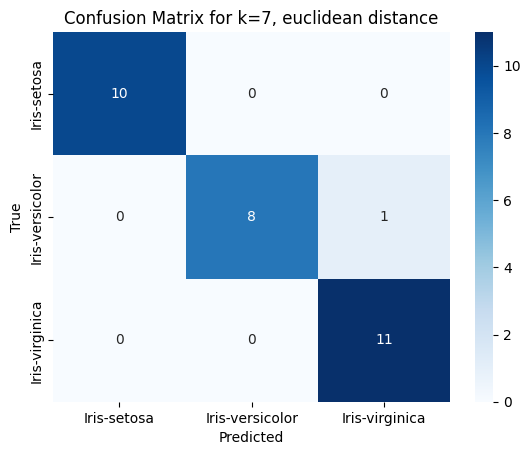

k=7, distance_metric=manhattan, accuracy score=100.0, number of correct predictions=30, number of incorrect predictions=0


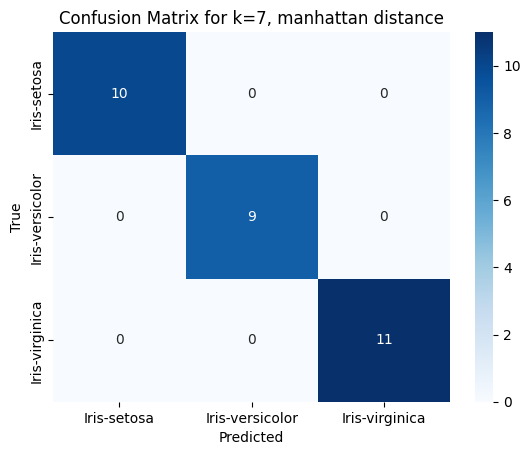

k=7, distance_metric=cosine, accuracy score=100.0, number of correct predictions=30, number of incorrect predictions=0


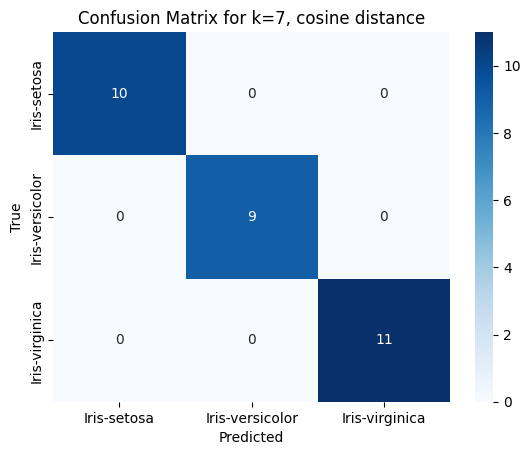

In [34]:
# Evaluate the KNN model with different distance measures:
k_values = [3, 5, 7]
distance_metrics = ["euclidean", "manhattan", "cosine"]
for k in k_values:
    for distance_metric in distance_metrics:
        accuracy, correct_predictions, incorrect_predictions, conf_matrix = knn_classifier(X_train, Y_train, X_test, Y_test, k, distance_metric)
        print(f"k={k}, distance_metric={distance_metric}, accuracy score={accuracy*100}, number of correct predictions={correct_predictions}, number of incorrect predictions={incorrect_predictions}")
        # Plot confusion matrix
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=Y.unique(), yticklabels=Y.unique())
        plt.title(f'Confusion Matrix for k={k}, {distance_metric} distance')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
